In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Model Setup

In [2]:
def delta_cases_per_day(E, pn, nd):
    
    # change in cases per day, d_nd+1 = E * P(n) * nd
    #     - E: current population of infected
    #     - P(n): probability of infected
    #     - nd: number of cases that day

    return E*pn*nd

def new_cases_next_day(d_nd, nd):
    return d_nd + nd


def cases_for_any_day(n0, E, pn, d):
    
    # Total number of cases for the current day d is;

    # - nd = n0*k^d
    # - Where n0 is the start of the outbreak and d is the number of days since outbreak
    
    # - Standard form: y = ab^x
    #    - Where x is the number of days since infection
    
    return n0*np.power((1 + E*pn), d)


# One day simulation

In [3]:
# simulate exponential growth for one day

# one day
E = 100
pn = 0.002
n0 = 1000

new_cases_pd = delta_cases_per_day(E, pn, n0)
new_cases_tommorow = new_cases_next_day(new_cases_pd, n0)
new_cases_any_day = cases_for_any_day(n0, E, pn, 1)

# projection to total population
E = 111
pn = 0.002
n0 = 100

total_population = cases_for_any_day(n0, E, pn, 90)

print(f"""
    
    Assumptions:
    People exposed by the virus      : {E}
    Probability of virus infection   : {pn}
    Number of reported infections    : {n0}
    
    Model output:
    New infections today             : {new_cases_pd}
    New cases the tommorow           : {new_cases_tommorow}
    Growth Factor (E*pn)             : {new_cases_tommorow/n0}
    
    4 month projection Projection    : {round(total_population, 2)}
    
""")


    
    Assumptions:
    People exposed by the virus      : 111
    Probability of virus infection   : 0.002
    Number of reported infections    : 100
    
    Model output:
    New infections today             : 200.0
    New cases the tommorow           : 1200.0
    Growth Factor (E*pn)             : 12.0
    
    4 month projection Projection    : 6861333540.39
    



In [4]:
# simulating 130 days
E = 111
pn = 0.002
n0 = 100

day_since_outbreak = []
total_cases = []
pr_infection = []
npop = 7775337441 # from projected global populatio estimate

for i in range(1, 91, 1):
    day_since_outbreak.append(i)
    total_cases.append(cases_for_any_day(n0, E, pn, i))
    pr_infection.append(cases_for_any_day(n0, E, pn, i)/npop)
    
df_exponential = pd.DataFrame({
    "days_since_outbreak": day_since_outbreak,
    "total_cases": total_cases
})

df_log = pd.DataFrame({
    "days_since_outbreak": day_since_outbreak,
    "total_cases": np.log(total_cases)
})

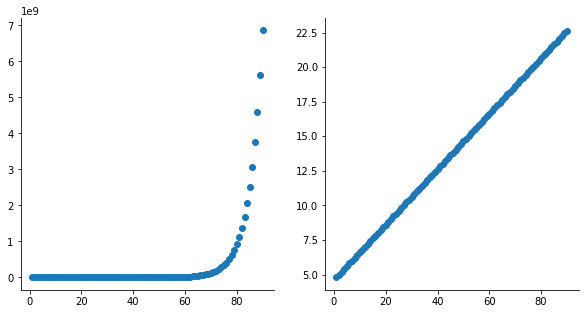

In [5]:
# Plot exponential
fig = plt.figure(figsize=(10, 5))
ax_1 = plt.subplot(1, 2, 1)
ax_1.scatter(x=df_exponential["days_since_outbreak"], y=df_exponential["total_cases"])

ax_2 = plt.subplot(1, 2, 2)
ax_2.scatter(x=df_log["days_since_outbreak"], y=df_log["total_cases"])

# Decorative properties
ax_1.spines['right'].set_visible(False)
ax_1.spines['top'].set_visible(False)

ax_2.spines['right'].set_visible(False)
ax_2.spines['top'].set_visible(False)


The only way this goes down is if the following are reduced,
1. The number of people exposed
2. The probability of virus infection from one person to another

Given a constant growth factor, the entire worlds population would be infected in 130 days.

In this scenario, the probability of a person becoming infected depends on whether they are exposed or not. As more people become infected, the likelihood for any individual becoming infected decreases. Because they become infected.

Therefore, the adjusted probability of exposure is;

    p = (1 - nd/pop)

    Where,
    
    nd - current number of cases
    pop - The total population

## Simulating a theoretical 90 day cycle

In [6]:
logit = lambda L, k, x, x0: L/np.sum([1, np.exp(-k*(x-x0))])

# L: Curve's maximum value
# k: logistic growth rate
# x: current day
# x0: midpoint of growth characteristics

In [7]:
import ipywidgets as widgets
from ipywidgets import AppLayout, HTML, Layout

global country_val

def f(country):

    country_val = country
    
    fig = plt.figure(figsize=(10, 5))
    ax_1 = plt.subplot(1, 2, 1)
    ax_1.scatter(x=df_exponential["days_since_outbreak"], y=df_exponential["total_cases"])
    ax_1.set_title(country)
    
def g(country):
    fig = plt.figure(figsize=(10, 5))
    ax_1 = plt.subplot(1, 2, 1)
    ax_1.scatter(x=df_exponential["days_since_outbreak"], y=df_exponential["total_cases"])
    ax_1.set_title(country)
    
# Provide feature selection drop down
i = widgets.interactive(
    f, 
    country=[1, 2, 3]
)

j = widgets.interactive(
    g, 
    country=[1, 2, 3]
)

In [8]:
header = HTML("<h3>Growth Factor of {}</h3>".format(i.children[0].value), layout=Layout(height='auto'))
header.style.text_align='center'

app = AppLayout(
    header = header,
    left_sidebar = i,
    right_sidebar = j,
#     height='600px',
#     width = "70%",
)

# display(header)
display(app)

AppLayout(children=(HTML(value='<h3>Growth Factor of 1</h3>', layout=Layout(grid_area='header', height='auto')…

In [9]:
# simulating 90 days

cases_today = []
npop = 7775337441 # from projected estimate
days = np.arange(1, 91, 1)

for day in days:
    logit_today = logit(1, 1.2, day, 45)
    cases_today.append(logit_today*npop)
    
#     print(n)
df = pd.DataFrame({
    "days_since_outbreak": days,
    "total_cases": cases_today
})

# # Plot exponential
# fig = plt.figure(figsize=(10, 5))
# ax_1 = plt.subplot(1, 2, 1)
# ax_1.scatter(x=df["days_since_outbreak"], y=df["total_cases"])
# # ax_1.plot(df["days_since_outbreak"], df["total_cases"])


# ax_2 = plt.subplot(1, 2, 2)
# ax_2.scatter(x=df["days_since_outbreak"], y=np.log10(df["total_cases"]))
# # ax_2.plot(df["days_since_outbreak"], np.log(df["total_cases"]))

# # Decorative properties
# ax_1.spines['right'].set_visible(False)
# ax_1.spines['top'].set_visible(False)

# ax_2.spines['right'].set_visible(False)
# ax_2.spines['top'].set_visible(False)


## Simulating different growth scenarios

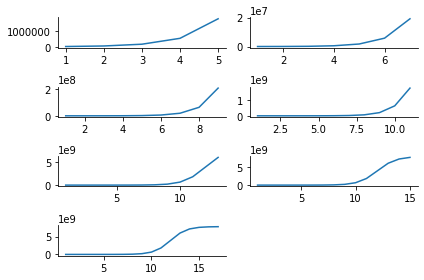

In [10]:
# simulating 90 days

cases_today = []
npop = 7775337441 # from projected estimate
plot_c = 1

for scaled_range in range(6, 20, 2):

    scaled_days = np.arange(1, scaled_range, 1)
    
    for day in scaled_days:
        logit_today = logit(1, 1.2, day, 12)
        cases_today.append(logit_today*npop)

    #     print(n)
    df = pd.DataFrame({
        "days_since_outbreak": scaled_days,
        "total_cases": cases_today
    })

    # Plot exponential
#     fig = plt.figure(figsize=(10, 2))
    ax_1 = plt.subplot(4, 2, plot_c)
    ax_1.plot(df["days_since_outbreak"], df["total_cases"])


    # Decorative properties
    ax_1.spines['right'].set_visible(False)
    ax_1.spines['top'].set_visible(False)
    plt.tight_layout()
    
    
    plot_c += 1
    cases_today = []

# Summary
1. The mid point can be controlled by x0
    - How many days after the start of the outbreak is addressed with a lockdown
2. The spread can be controlled by the number of scaled days
    - How long is the pandemic likely to spread

In [11]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 1CC9-289F

 Directory of C:\Users\nrosh\Desktop\Coding Projects\COVID19

2020/03/21  22:34    <DIR>          .
2020/03/21  22:34    <DIR>          ..
2020/03/18  22:40    <DIR>          .ipynb_checkpoints
2020/03/21  22:34            29ÿ798 COVID-19 Exploratory Analysis.ipynb
2020/03/21  00:52            54ÿ134 COVID-19 Model Theory.ipynb
2020/03/18  21:03    <DIR>          data
2020/03/21  22:21               466 introduction.html
2020/03/21  21:35               988 load_jhp_data.py
2020/03/21  21:33                15 test_jupyter.py
               5 File(s)         85ÿ401 bytes
               4 Dir(s)  315ÿ976ÿ257ÿ536 bytes free


In [140]:
geographical_cat_features = ["Country/Region", "Province/State"]
geographical_float_features = ["Lat", "Long"]
src_df_confirmed = "data/df_confirmed.csv"
df_confirmed = pd.read_csv(src_df_confirmed)
df = df_confirmed.head()
df = df.drop(["Unnamed: 0"], axis=1)

In [22]:
# get dates only
dates_df = df.drop(geographical_float_features+geographical_cat_features, axis=1)
growth_factor_df = dates_df.copy()

In [116]:
def get_growth_factor(df):
    growth_factor = {}

    # initialize growth factor
    for i in df.index.to_list():
        growth_factor[i] = None

    for index, val in df.iterrows():
        # get growth_factor for each row
        growth_factor[index] = np.array(df.iloc[index, 1:])/np.array(df.iloc[index, 0:-1])
    
    return pd.DataFrame(growth_factor).replace({float('inf'): None, np.nan: None})


In [129]:
%%capture
g_factors = get_growth_factor(dates_df).T

In [130]:
g_factors.columns = dates_df.columns[1:]
df_growth_factors = pd.concat(
    [df.loc[:, geographical_cat_features+geographical_float_features],
    g_factors],
    axis=1
    )
# for column in geographical_cat_features+geographical_float_features:
#     df_gfactor[column] = df[column]

In [3]:
import pandas as pd
df = pd.read_csv("df_all.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89121 entries, 0 to 89120
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_region  89121 non-null  object 
 1   province_state  59475 non-null  object 
 2   lat             89121 non-null  float64
 3   long            89121 non-null  float64
 4   case_type       89121 non-null  object 
 5   date            89121 non-null  object 
 6   cases           89121 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 4.8+ MB


In [14]:
type_val = []

for index in df.country_region.index:
    type_val.append(type(df.country_region.iloc[index]))
    
pd.DataFrame(type_val).loc[:, 0].value_counts()

<class 'str'>    89121
Name: 0, dtype: int64

In [25]:
df.country_region = df.country_region.astype('string')
df.province_state = df.province_state.astype('string')
df.case_type = df.case_type.astype('string')
df.date = pd.to_datetime(df.date)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89121 entries, 0 to 89120
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   country_region  89121 non-null  string        
 1   province_state  59475 non-null  string        
 2   lat             89121 non-null  float64       
 3   long            89121 non-null  float64       
 4   case_type       89121 non-null  string        
 5   date            89121 non-null  datetime64[ns]
 6   cases           89121 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), string(3)
memory usage: 4.8 MB


In [30]:
import json

with open('meta/previous_batch_meta.json') as f:
    data = json.load(f)
    
print(data)

{'bath_rows_before': 0}


In [29]:
data["bath_rows_before"]

0

In [33]:
len(df.index)

89121